<a href="https://colab.research.google.com/github/melvin-02/Colab-CNN/blob/master/TF2_0_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train , X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
K = len(set(y_train))
K

10

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs =50 , validation_data=(X_test, y_test))

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = 1562
r = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, validation_data=(X_test, y_test), epochs=50)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 46s 29ms/step - loss: 1.3821 - accuracy: 0.5181 - val_loss: 1.0179 - val_accuracy: 0.6438
Epoch 2/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.9944 - accuracy: 0.6536 - val_loss: 0.9744 - val_accuracy: 0.6765
Epoch 3/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.8431 - accuracy: 0.7096 - val_loss: 0.7679 - val_accuracy: 0.7361
Epoch 4/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.7548 - accuracy: 0.7426 - val_loss: 0.7443 - val_accuracy: 0.7511
Epoch 5/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.6816 - accuracy: 0.7670 - val_loss: 0.6723 - val_accuracy: 0.7773
Epoch 6/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.6306 - accuracy: 0.7849 - val_loss: 0.5706 - val_accuracy: 0.8075
Epoch 7/50
1562/1562 [==========================

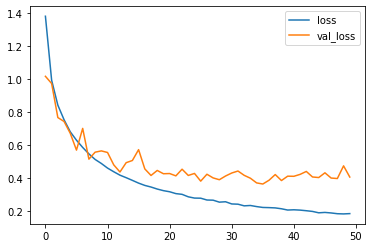

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

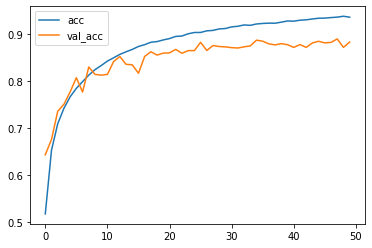

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[910  10   5  11   5   4   3   3  32  17]
 [  4 950   1   2   1   1   1   0   8  32]
 [ 44   1 776  44  34  37  51   5   5   3]
 [ 10   6  10 815  16  74  44  10   3  12]
 [  7   2  16  40 858  29  25  21   1   1]
 [  6   3  11 107  19 814  20  13   3   4]
 [  3   0   8  20   3   5 957   0   2   2]
 [  7   1   7  28  22  26   8 895   3   3]
 [ 26  11   1   8   2   0   6   2 925  19]
 [  7  41   2   2   2   0   3   1   9 933]]


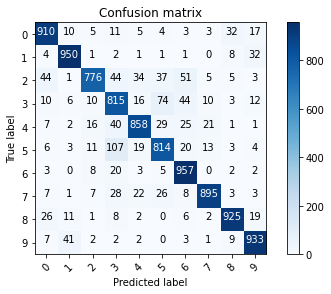

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

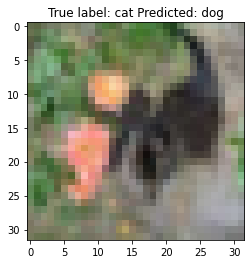

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 